In [1]:
import os,shutil,random,re
import numpy as np
import time
import tensorflow as tf
import json
import cv2
from matplotlib import pyplot as plt
from PIL import Image
np.set_printoptions(suppress=True)

In [2]:
cate_order = ['0','A3 Sportback','A4L','A5 Sportback','A6L', 'A7 Sportback', 'Q5L Sportback', 'Q7', 'RS5']
cate = cate_order[1:]

master_file_train = np.load('/mnt/multi-class_simu/real data/Audi/data/master_file_train_8cls.npy')
master_file_test = np.load('/mnt/multi-class_simu/real data/Audi/data/master_file_test_8cls.npy')

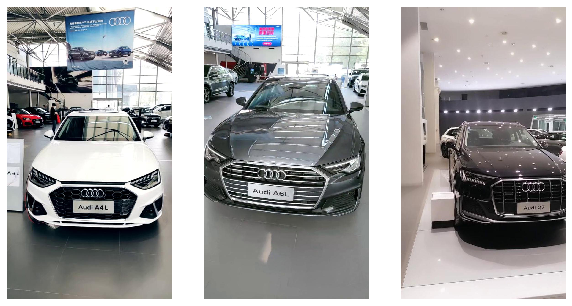

In [3]:
'''
Original images
'''
pic_dir = '/mnt/multi-class_simu/real data/Audi/data/Images_random_8cls/train/'

fig,ax = plt.subplots(1,3)  
fig.set_figwidth(10)  
fig.set_figheight(8)   
ax = ax.flatten()

k = 2; i = 0
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].imshow(img)  
ax[0].spines['top'].set_visible(False); ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False); ax[0].spines['left'].set_visible(False)

k = 4; i = 20
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].imshow(img)  
ax[1].spines['top'].set_visible(False); ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False); ax[1].spines['left'].set_visible(False)

k = 7; i = 55
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].imshow(img)  
ax[2].spines['top'].set_visible(False); ax[2].spines['right'].set_visible(False)
ax[2].spines['bottom'].set_visible(False); ax[2].spines['left'].set_visible(False)

# plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/eg.png', dpi=600, bbox_inches='tight') # Save the image
plt.show()

In [41]:
'''
Bounding boxes
'''
k = 2; i = 0
k = 4; i = 20
k = 7; i = 55
pics = os.listdir(pic_dir+cate_order[k]+'/')

for j in range(len(master_file_train)):  
    ## 匹配bbox
    infor = master_file_train[j].split('\t')
    _name = infor[1]
    _cate = infor[0]
    if _name == pics[i] and _cate == cate_order[k]:
        print(infor)

['Q7', '4619.jpg', '[862, 897, 530, 631]\n']


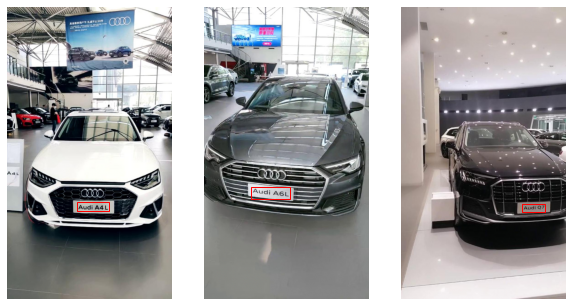

In [42]:
'''
Original images with red bounding boxes
'''
pic_dir = '/mnt/multi-class_simu/real data/Audi/data/Images_random_8cls/train/'

fig,ax = plt.subplots(1,3)                                                              
fig.set_figwidth(10)                                                                                                   
fig.set_figheight(8)   
ax = ax.flatten()

k = 2; i = 0
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].imshow(img)  
ax[0].spines['top'].set_visible(False); ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False); ax[0].spines['left'].set_visible(False)
y0,y1,x0,x1 = 857, 895, 305, 446           
rect = plt.Rectangle((x0, y0), x1-x0, y1-y0, fill=False, edgecolor = 'red',linewidth=1)
ax[0].add_patch(rect)

k = 4; i = 20
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].imshow(img)  
ax[1].spines['top'].set_visible(False); ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False); ax[1].spines['left'].set_visible(False)
y0,y1,x0,x1 = 787, 841, 204, 374   # MANDATORY traffic sign        
rect = plt.Rectangle((x0, y0), x1-x0, y1-y0, fill=False, edgecolor = 'red',linewidth=1)
ax[1].add_patch(rect)

k = 7; i = 55
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].imshow(img)  
ax[2].spines['top'].set_visible(False); ax[2].spines['right'].set_visible(False)
ax[2].spines['bottom'].set_visible(False); ax[2].spines['left'].set_visible(False)
y0,y1,x0,x1 = 862, 897, 530, 631   # MANDATORY traffic sign        
rect = plt.Rectangle((x0, y0), x1-x0, y1-y0, fill=False, edgecolor = 'red',linewidth=1)
ax[2].add_patch(rect)

# plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/bbox.png', dpi=600, bbox_inches='tight') # Save the image
plt.show()

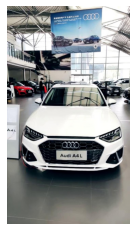

In [44]:
k = 2; i = 0
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
plt.imshow(img)  
ax = plt.gca()
ax.set_xticks([]); ax.set_yticks([]); 

ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)

# plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/org.png', dpi=600, bbox_inches='tight') # Save the image
plt.show()

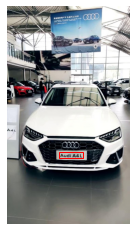

In [45]:
k = 2; i = 0
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
plt.imshow(img)  
ax = plt.gca()
ax.set_xticks([]); ax.set_yticks([]); 

ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)

y0,y1,x0,x1 = 857, 895, 305, 446   
rect = plt.Rectangle((x0, y0), x1-x0, y1-y0, fill=False, edgecolor = 'red',linewidth=1)
ax.add_patch(rect)

# plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/gt_box.png', dpi=600, bbox_inches='tight') # Save the image
plt.show()

In [47]:
def predbox_gen(nbox, _imsize_x, _imsize_y, seed=0, dx=2048, dy=2048):
    np.random.seed(seed)
    _x0 = np.random.randint(0, dx-_imsize_x, [nbox,1]); _x1 = _x0+_imsize_x
    _y0 = np.random.randint(0, dy-_imsize_y, [nbox,1]); _y1 = _y0+_imsize_y
    predbox = np.hstack((_x0,_y0,_x1,_y1,np.zeros([nbox,1])))

    predbox[predbox<0] = 0
    predbox_x = predbox[:,[0,2]]; predbox_x[predbox_x>dx] = dx
    predbox_y = predbox[:,[1,3]]; predbox_y[predbox_y>dy] = dy
    predbox[:,[0,2]] = predbox_x; predbox[:,[1,3]] = predbox_y; 
    del predbox_x, predbox_y
    return predbox

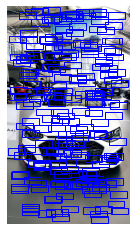

In [52]:
nbox = 200; imsize_x = 40; imsize_y = 100

k = 2; i = 0
pics = os.listdir(pic_dir+cate_order[k]+'/')
img = np.array(Image.open(pic_dir+cate_order[k]+'/'+pics[i]))/255 
[dx,dy,_] = img.shape
Preds = predbox_gen(nbox,imsize_x,imsize_y,3,dx,dy)
plt.imshow(img)
ax = plt.gca()
ax.set_xticks([]); ax.set_yticks([]);   
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)

for i in range(nbox):
    [x0,y0,x1,y1] = Preds[i,0:4] 
    rect = plt.Rectangle((y0, x0), y1-y0, x1-x0, fill=False, edgecolor = 'blue', linewidth = 1)
    ax.add_patch(rect)
plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/pred_box.png', dpi=600, bbox_inches='tight') # Save the image
plt.show()

In [54]:
traindata = np.load(f'/mnt/multi-class_simu/real data/Audi/data/traindata_8cls.npz')
testdata = np.load(f'/mnt/multi-class_simu/real data/Audi/data/testdata_8cls.npz')
Ns0 = traindata['Ns0']
Ns1 = testdata['Ns1']

In [62]:
(Ns0[0]+Ns1[0])/np.sum(Ns0+Ns1), np.sum(Ns1+Ns0)

(0.954280919737218, 56016.0)

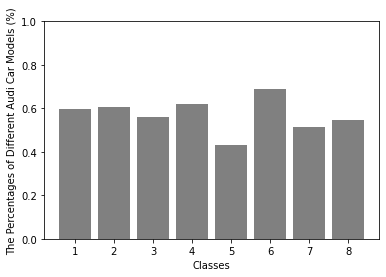

In [61]:
K = 8
pers = (Ns1+Ns0)/np.sum(Ns1+Ns0)
plt.bar(np.arange(K),pers[1:]*100,color='gray')
plt.xticks(np.arange(K), np.arange(K)+1)
plt.ylim(0,1)
plt.xlabel('Classes')
plt.ylabel('The Percentages of Different Audi Car Models (%)')
plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/cate_bar.jpg',dpi=600)
plt.show()

In [73]:
os.listdir(pic_dir)

['A6L',
 'Q5L Sportback',
 '0',
 'A4L',
 'A3 Sportback',
 'RS5',
 'A7 Sportback',
 'Q7',
 'A5 Sportback']

In [70]:
os.listdir(pic_dir)[0]

'A6L'

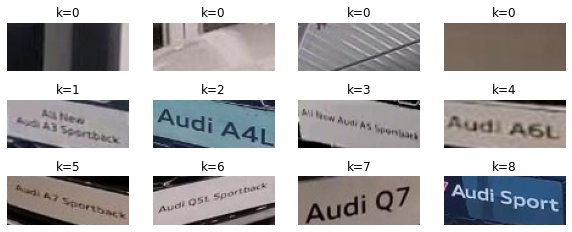

In [83]:
nx = 3; ny = 4
pic_dir = '/mnt/multi-class_simu/real data/Audi/data/signs_8cls/train/'
X_pic = np.zeros([nx*ny,40,100,3])

list0 = os.listdir(pic_dir + cate_order[0]) 
for i in range(ny):
    X_pic[i] = np.array(Image.open(pic_dir + cate_order[0]+'/'+list0[i+11]))/255
    
k = 0
for i in range(ny, ny*nx):
    k += 1
    list0 = os.listdir(pic_dir + cate_order[k])
    X_pic[i] = np.array(Image.open(pic_dir + cate_order[k]+'/'+list0[i]))/255
    
fig,ax = plt.subplots(nx,ny); fig.set_figheight(4); fig.set_figwidth(10)  
ax = ax.flatten()      
for i in range(nx*ny):
    ax[i].imshow(X_pic[i]); 
    if i < ny:
        ax[i].set_title(f'k=0',fontsize=12)     
    else:
        ax[i].set_title(f'k={i+1-ny}',fontsize=12)
    ax[i].set_xticks([]); ax[i].set_yticks([])
    ax[i].spines['top'].set_visible(False); ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False); ax[i].spines['left'].set_visible(False)
plt.savefig('/mnt/multi-class_simu/real data/Audi/pic/sub.png', dpi=600, bbox_inches='tight') # Save the image
plt.show()